# Solving cartpole task with policy-based RL algorithms

**Decription of the task:**
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import gym
import agents

In [2]:
from importlib import reload
reload(agents)

<module 'agents' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/agents.py'>

In [3]:
def play_episode(agent, env, return_states=False, greedy=True):
    # Reset environment (start of an episode)
    state = env.reset()
    rewards = []
    log_probs = []
    done = []
    
    if return_states:
        states = [state]
        
    steps = 0
    while True:
        action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        
        if return_states:
            states.append(new_state)
            
        #if terminal and 'TimeLimit.truncated' not in info:
        #    reward = -1
            
        rewards.append(reward)
        log_probs.append(log_prob)
        done.append(terminal)
        
        if terminal:
            break
            
        state = new_state
       
    rewards = np.array(rewards)
    log_probs = np.array(log_probs)
    done = np.array(done)
    
    if return_states:
        return rewards, log_probs, np.array(states), done
    else:
        return rewards, log_probs, done

In [4]:
def train_cartpole(n_episodes = 100, lr = 0.01, gamma = 0.99):
    # Create environment
    env = gym.make("CartPole-v1")
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    # Init agent
    agent = agents.PolicyGrad(observation_space, action_space, lr, gamma)
    performance = []
    for e in range(n_episodes):
        rewards, log_probs, _ = play_episode(agent, env, greedy=False)
        
        performance.append(np.sum(rewards))
        print("Episode %d - reward: %.0f"%(e+1, performance[-1]))
        
        agent.update(rewards, log_probs)
        
    return agent, np.array(performance)

In [10]:
%%time
trained_agentPG, cumulative_rewardPG = train_cartpole(n_episodes = 200)

Episode 1 - reward: 33
Episode 2 - reward: 19
Episode 3 - reward: 16
Episode 4 - reward: 34
Episode 5 - reward: 16
Episode 6 - reward: 11
Episode 7 - reward: 14
Episode 8 - reward: 12
Episode 9 - reward: 10
Episode 10 - reward: 12
Episode 11 - reward: 10
Episode 12 - reward: 12
Episode 13 - reward: 13
Episode 14 - reward: 14
Episode 15 - reward: 19
Episode 16 - reward: 11
Episode 17 - reward: 13
Episode 18 - reward: 24
Episode 19 - reward: 16
Episode 20 - reward: 15
Episode 21 - reward: 11
Episode 22 - reward: 18
Episode 23 - reward: 11
Episode 24 - reward: 19
Episode 25 - reward: 18
Episode 26 - reward: 13
Episode 27 - reward: 16
Episode 28 - reward: 85
Episode 29 - reward: 14
Episode 30 - reward: 19
Episode 31 - reward: 28
Episode 32 - reward: 34
Episode 33 - reward: 16
Episode 34 - reward: 38
Episode 35 - reward: 24
Episode 36 - reward: 29
Episode 37 - reward: 36
Episode 38 - reward: 23
Episode 39 - reward: 34
Episode 40 - reward: 17
Episode 41 - reward: 57
Episode 42 - reward: 16
E

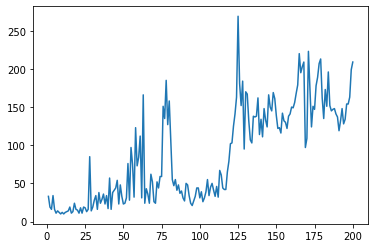

In [11]:
episodes = np.arange(1,len(cumulative_rewardPG)+1)
plt.plot(episodes, cumulative_rewardPG)

In [12]:
def render_test_episode(agent):
    # Create environment
    env = gym.make("CartPole-v1")
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    state = env.reset()
    while True:
        env.render()
        action = agent.get_action(state, return_log = False, greedy=False)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        if terminal: 
            break
        else: 
            state = new_state
    env.close()

In [13]:
render_test_episode(trained_agentPG) 

# Advantage Actor-Critic - Step update version

In [14]:
from importlib import reload
reload(agents)

<module 'agents' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/agents.py'>

In [20]:
def train_cartpole_A2C_v0(n_epochs = 100, lr = 0.01, gamma = 0.99, greedy=False):
    # Create environment
    env = gym.make("CartPole-v1")
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    # Init agent
    agent = agents.A2C_v0(observation_space, action_space, lr, gamma)
    performance = []
    for e in range(n_epochs):
        # Reset environment (start of an episode)
        state = env.reset()
        rewards = []

        steps = 0
        while True:
            action, log_prob = agent.get_action(state, return_log = True, greedy=greedy)
            new_state, reward, terminal, info = env.step(action) # gym standard step's output

            #if terminal and 'TimeLimit.truncated' not in info:
            #    reward = -1

            rewards.append(reward)
            agent.update(reward, log_prob, state, new_state, terminal)
            
            if terminal:
                break

            state = new_state
            
            
        rewards = np.array(rewards)
        performance.append(np.sum(rewards))
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.0f"%(e+1, performance[-1]))

    return agent, np.array(performance)

In [21]:
%%time
agent, performance = train_cartpole_A2C_v0(n_epochs=500, lr=1e-4)

Episode 10 - reward: 9
Episode 20 - reward: 14
Episode 30 - reward: 23
Episode 40 - reward: 31
Episode 50 - reward: 13
Episode 60 - reward: 16
Episode 70 - reward: 14
Episode 80 - reward: 15
Episode 90 - reward: 63
Episode 100 - reward: 12
Episode 110 - reward: 17
Episode 120 - reward: 19
Episode 130 - reward: 24
Episode 140 - reward: 14
Episode 150 - reward: 27
Episode 160 - reward: 19
Episode 170 - reward: 33
Episode 180 - reward: 46
Episode 190 - reward: 16
Episode 200 - reward: 40
Episode 210 - reward: 101
Episode 220 - reward: 27
Episode 230 - reward: 20
Episode 240 - reward: 62
Episode 250 - reward: 31
Episode 260 - reward: 24
Episode 270 - reward: 16
Episode 280 - reward: 28
Episode 290 - reward: 14
Episode 300 - reward: 60
Episode 310 - reward: 30
Episode 320 - reward: 30
Episode 330 - reward: 30
Episode 340 - reward: 24
Episode 350 - reward: 58
Episode 360 - reward: 23
Episode 370 - reward: 15
Episode 380 - reward: 13
Episode 390 - reward: 10
Episode 400 - reward: 31
Episode 4

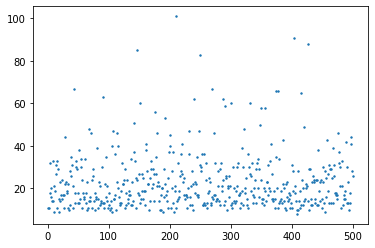

In [22]:
episodes = np.arange(1,len(performance)+1)
plt.scatter(episodes, performance, s=2)

In [19]:
render_test_episode(agent) 

# Advantage Actor-Critic - trajectory version

In [23]:
from importlib import reload
reload(agents)

<module 'agents' from '/home/nicola/Nicola_unipd/MasterThesis/Policy-based-RL/agents.py'>

In [24]:
class experience_buffer():
    def __init__(self, r_list, logp_list, s_list, done_list):
        self.r_list = r_list
        self.logp_list = logp_list
        self.s_list = s_list
        self.done_list = done_list
    
    def get_exp(self):
        L = np.min([len(r) for r in self.r_list])
        r_list_final = np.array([x[-L:] for x in self.r_list])
        logp_list_final = np.array([x[-L:] for x in self.logp_list])
        s_list_final = np.array([x[-L-1:] for x in self.s_list])
        done_list_final = np.array([x[-L:] for x in self.done_list])
        return r_list_final, logp_list_final, s_list_final, done_list_final

In [29]:
def train_cartpole_A2C_v1(n_epochs = 100, n_batches = 1, lr = 0.01, gamma = 0.99):
    # Create environment
    env = gym.make("CartPole-v1")
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    # Init agent
    agent = agents.A2C_v1(observation_space, action_space, lr, gamma)
    performance = []
    for e in range(n_epochs):
        r_list = []
        logp_list = []
        s_list = []
        done_list = []
        score = []
        
        for b in range(n_batches):
            rewards, log_probs, states, done = play_episode(agent, env, return_states=True, greedy=False)
            r_list.append(rewards)
            logp_list.append(log_probs)
            s_list.append(states)
            done_list.append(done)
            score.append(np.sum(rewards))
            
        performance.append(np.mean(score))
        print("Epoch %d - mean reward: %.0f"%(e+1, performance[-1]))
        exp_buff = experience_buffer(r_list, logp_list, s_list, done_list)
        rewards, log_probs, states, done = exp_buff.get_exp()
        #print("rewards.shape ", rewards.shape)
        #print("log_probs.shape ", log_probs.shape)
        #print("states.shape ", states.shape)
        #print("done.shape ", done.shape)
        #print("done ", done)
        agent.update(rewards, log_probs, states, done)
        
    return agent, np.array(performance)

In [30]:
%%time
agent_v1, performance_v1 = train_cartpole_A2C_v1(n_epochs=500, lr=1e-4)

Epoch 1 - mean reward: 33
Epoch 2 - mean reward: 9
Epoch 3 - mean reward: 26
Epoch 4 - mean reward: 13
Epoch 5 - mean reward: 49
Epoch 6 - mean reward: 43
Epoch 7 - mean reward: 17
Epoch 8 - mean reward: 13
Epoch 9 - mean reward: 10
Epoch 10 - mean reward: 22
Epoch 11 - mean reward: 11
Epoch 12 - mean reward: 25
Epoch 13 - mean reward: 15
Epoch 14 - mean reward: 23
Epoch 15 - mean reward: 24
Epoch 16 - mean reward: 12
Epoch 17 - mean reward: 19
Epoch 18 - mean reward: 11
Epoch 19 - mean reward: 17
Epoch 20 - mean reward: 14
Epoch 21 - mean reward: 13
Epoch 22 - mean reward: 37
Epoch 23 - mean reward: 31
Epoch 24 - mean reward: 19
Epoch 25 - mean reward: 16
Epoch 26 - mean reward: 24
Epoch 27 - mean reward: 47
Epoch 28 - mean reward: 12
Epoch 29 - mean reward: 16
Epoch 30 - mean reward: 16
Epoch 31 - mean reward: 20
Epoch 32 - mean reward: 20
Epoch 33 - mean reward: 15
Epoch 34 - mean reward: 16
Epoch 35 - mean reward: 32
Epoch 36 - mean reward: 20
Epoch 37 - mean reward: 20
Epoch 38 - 

Epoch 303 - mean reward: 13
Epoch 304 - mean reward: 36
Epoch 305 - mean reward: 41
Epoch 306 - mean reward: 23
Epoch 307 - mean reward: 13
Epoch 308 - mean reward: 13
Epoch 309 - mean reward: 25
Epoch 310 - mean reward: 20
Epoch 311 - mean reward: 11
Epoch 312 - mean reward: 15
Epoch 313 - mean reward: 15
Epoch 314 - mean reward: 26
Epoch 315 - mean reward: 32
Epoch 316 - mean reward: 13
Epoch 317 - mean reward: 25
Epoch 318 - mean reward: 17
Epoch 319 - mean reward: 14
Epoch 320 - mean reward: 12
Epoch 321 - mean reward: 26
Epoch 322 - mean reward: 22
Epoch 323 - mean reward: 11
Epoch 324 - mean reward: 17
Epoch 325 - mean reward: 17
Epoch 326 - mean reward: 18
Epoch 327 - mean reward: 17
Epoch 328 - mean reward: 37
Epoch 329 - mean reward: 29
Epoch 330 - mean reward: 17
Epoch 331 - mean reward: 16
Epoch 332 - mean reward: 16
Epoch 333 - mean reward: 13
Epoch 334 - mean reward: 13
Epoch 335 - mean reward: 43
Epoch 336 - mean reward: 31
Epoch 337 - mean reward: 24
Epoch 338 - mean rew

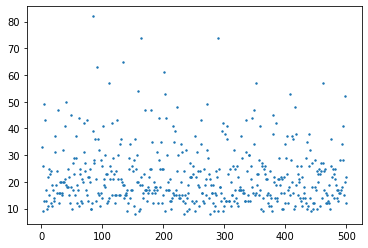

In [31]:
episodes = np.arange(1,len(performance_v1)+1)
plt.scatter(episodes, performance_v1, s=2)

In [32]:
render_test_episode(agent_v1) 